# UQO projet data science 2024
Groupe : Bryan, Megane, Nelli

## Objectifs
- Étudiez l'ensemble de données pour prédire quelles sont les caractéristiques les plus importantes pour prédire si une personne est diabétique.
concretement, nous allons:
1- etudier l'ensemble de donnees
2- faire des predictions sur l'etat de sante des individus en fonction des informations.
3- identifier les variables qui ont plus d'impact sur la probabilite d'etre diabetique.


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Étape 1 : Chargement des données


In [49]:
dataframe = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
dataframe.head()

colonnes = dataframe.columns
print(colonnes)
dataframe.describe()

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


ici on importe nos donnees et on l'attribut a notre variable dataframe.

#Nomenclature des variables:

-- 1:Oui , 0:Non

1- Diabetes_012 : Indique la présence ou l'absence de diabète (par exemple, 0 = pas de diabète, 1 = prédiabète, 2 = diabète).

2- Hypertension (HighBP) : Indique si l'individu souffre d'hypertension (Oui/Non).

3- Cholestérol élevé (HighChol) : Indique si l'individu a un taux de cholestérol élevé (Oui/Non).

4- Vérification du cholestérol (CholCheck) : Indique si l'individu a fait vérifier son cholestérol récemment (5 dernières années) (Oui/Non).

5- IMC (BMI) : Indice de Masse Corporelle, une mesure de la graisse corporelle basée sur la taille et le poids.

6- Fumeur (Smoker) : Indique si l'individu fume actuellement ou a déjà fumé dans le passé (Oui/Non).

7- AVC (Stroke) : Indique si l'individu a déjà eu un accident vasculaire cérébral (Oui/Non).

8- Maladie cardiaque ou crise cardiaque (HeartDiseaseorAttack) : Indique si l'individu a déjà eu une maladie cardiaque ou une crise cardiaque (Oui/Non).

9- Activité physique (PhysActivity) : Indique si l'individu pratique une activité physique régulière (Oui/Non).

10- Fruits : Indique la fréquence de consommation de fruits (peut être binaire ou basée sur la fréquence).

11- Légumes (Veggies) : Indique la fréquence de consommation de légumes (semblable à Fruits).

12- Consommation d'alcool excessive (HvyAlcoholConsump) : Indicateur de consommation excessive d'alcool (Oui/Non ou basé sur la fréquence).

13- Couverture de soins de santé (AnyHealthcare) : Indique si l'individu dispose d'une couverture de soins de santé (Oui/Non).

14- Pas de médecin à cause du coût (NoDocbcCost) : Indique si l'individu a évité de voir un médecin en raison des coûts (Oui/Non).

15- Santé générale (GenHlth) : Auto-évaluation de l'état de santé général (souvent sur une échelle de 1 à 5, 1 = excellent, 5 = mauvais).

16- Santé mentale (MentHlth) : Nombre de jours durant lesquels l'individu a ressenti une mauvaise santé mentale au cours du mois précédent.

17- Santé physique (PhysHlth) : Nombre de jours durant lesquels l'individu a ressenti une mauvaise santé physique au cours du mois précédent.

18- Difficulté à marcher (DiffWalk) : Indique si l'individu a des difficultés à marcher (Oui/Non).

19- Sexe (Sex) : Sexe de l'individu (Homme/Femme).

20- Âge (Age) : Âge de l'individu (peut être continu ou catégorisé en tranches d'âge).

21- Niveau d'éducation (Education) : Niveau d'éducation atteint (par exemple, école secondaire, études supérieures).

22- Revenu (Income) : Niveau de revenu de l'individu (peut être catégorisé ou continu).


## Étape 2 : Néttoyage


In [50]:
# Check valeurs nulls
dataframe.isna().any()

Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

ici, nous avons chercher les valeurs nul dans notre dataset. et celui ci nous retourne false pour toute les colones.
cela voudrait dire que il y'a pas de valeur null dans nos donnees.

## Sélection des features

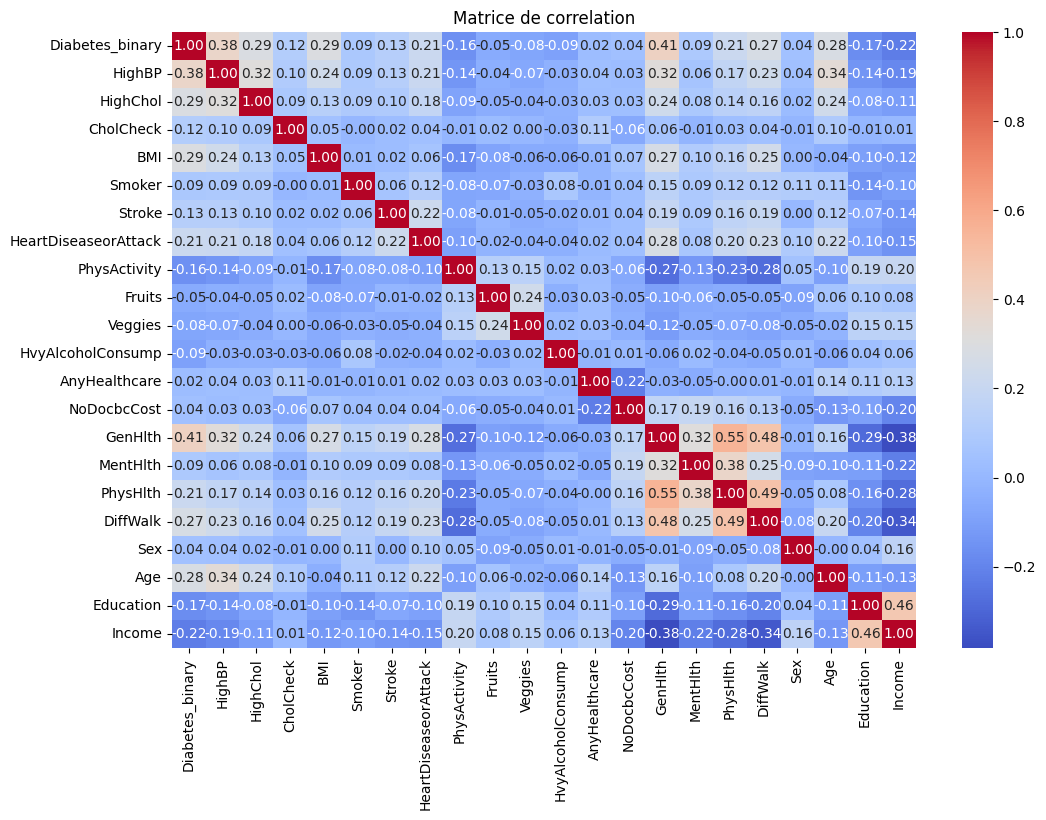

In [51]:
import seaborn as sns

# Calcul de la matrice de correlation
corr = dataframe.corr()

# affiche la figure
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matrice de correlation')
plt.show()


Ici nous voulons verifier  si il y'a correlation lineaire entre nos variables. Ceci nous permettra de voir si nos variables sont linéairement corrélées.

En examinant le graphique, on peut constater une relation positive entre les difficultés de marche (`DiffWalk`) d'une personne et son état de santé physique (`PhysHlth`). Cela signifie que plus une personne éprouve des difficultés à marcher, plus elle est susceptible d'avoir une mauvaise santé physique.

Nous constatons également que la santé physique (`PhysHlth`) a une corrélation linéaire positive avec la santé générale (`GenHlth`). Si quelqu'un se sent bien physiquement, généralement il se sent bien.

Nous remarquons également une légère corrélation linéaire entre le nombre de jours qu'un individu a ressenti du stress, de la dépression ou un problème émotionnel (`MentHlth`) et le nombre de jours que cet individu a ressenti un problème physique (`PhysHlth`).

Legère correlation linéaire entre diates_012 et High BP. Une corrélation positive de 0.38 est observée entre le diabète (`Diabetes_binary`) et l'hypertension (`HighBP`). Cela suggère que les personnes atteintes de diabète sont plus susceptibles de souffrir d'hypertension.



Étant donnée que la valeur que nous voulon prédire c'est (`Diabetes_binary`) notre objectif c'est de supprimer les variable qui ne permette pas d'expliquer la variable cible.


